**Instalación librerías**

In [32]:

!pip install selenium webdriver-manager pandas spacy transformers wordcloud matplotlib

**Importaciones**

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from transformers import pipeline
from wordcloud import WordCloud

In [35]:

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)
wait = WebDriverWait(driver, 15)


Device set to use cpu


In [37]:

data = []

driver.get("https://t.me/s/boyaca7dias")
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".tgme_widget_message_text")))
msgs = driver.find_elements(By.CSS_SELECTOR, ".tgme_widget_message_text")
for msg in msgs[:20]:
    headline = msg.text.split("\n")[0]
    data.append({"source": "Boyaca7dias", "text": headline})


driver.get("https://www.eltiempo.com/colombia/medellin")
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "h3 a")))
anchors = driver.find_elements(By.CSS_SELECTOR, "h3 a")
for a in anchors[:20]:
    data.append({"source": "ElTiempo_Medellin", "text": a.text})


df = pd.DataFrame(data)
sentiments = [sentiment_analyzer(txt)[0] for txt in df["text"]]
df["label"] = [s["label"] for s in sentiments]
df["score"] = [s["score"] for s in sentiments]


display(df)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,source,text,label,score
0,Boyaca7dias,Alcaldes de Duitama y Nobsa hacen llamado al d...,1 star,0.307626
1,Boyaca7dias,¡Boyacá tiene un nuevo multimillonario! https:...,5 stars,0.359535
2,Boyaca7dias,En la transversal del Sisga restablecieron pas...,4 stars,0.243326
3,Boyaca7dias,Fuerza Aeroespacial en Casanare impulsa proyec...,5 stars,0.370560
4,Boyaca7dias,Secretaría de Educación de Tunja reporta nueva...,1 star,0.338950
5,Boyaca7dias,Un día como hoy | 07 de agosto | #Efeméride7dí...,1 star,0.302677
6,Boyaca7dias,Con 72 instrumentos se fortalece la Orquesta S...,5 stars,0.464483
7,Boyaca7dias,Presunta falsedad en documento de Asocomunal S...,1 star,0.786122
8,Boyaca7dias,Representante que enfrentó a Petro en el Congr...,1 star,0.301354
9,Boyaca7dias,Se acaba la vida útil de los rellenos sanitari...,1 star,0.477967


In [38]:

df = pd.DataFrame(data)
sentiments = [sentiment_analyzer(txt)[0] for txt in df["text"]]
df["label"] = [s["label"] for s in sentiments]
df["score"] = [s["score"] for s in sentiments]


display(df)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,source,text,label,score
0,Boyaca7dias,Alcaldes de Duitama y Nobsa hacen llamado al d...,1 star,0.307626
1,Boyaca7dias,¡Boyacá tiene un nuevo multimillonario! https:...,5 stars,0.359535
2,Boyaca7dias,En la transversal del Sisga restablecieron pas...,4 stars,0.243326
3,Boyaca7dias,Fuerza Aeroespacial en Casanare impulsa proyec...,5 stars,0.370560
4,Boyaca7dias,Secretaría de Educación de Tunja reporta nueva...,1 star,0.338950
5,Boyaca7dias,Un día como hoy | 07 de agosto | #Efeméride7dí...,1 star,0.302677
6,Boyaca7dias,Con 72 instrumentos se fortalece la Orquesta S...,5 stars,0.464483
7,Boyaca7dias,Presunta falsedad en documento de Asocomunal S...,1 star,0.786122
8,Boyaca7dias,Representante que enfrentó a Petro en el Congr...,1 star,0.301354
9,Boyaca7dias,Se acaba la vida útil de los rellenos sanitari...,1 star,0.477967


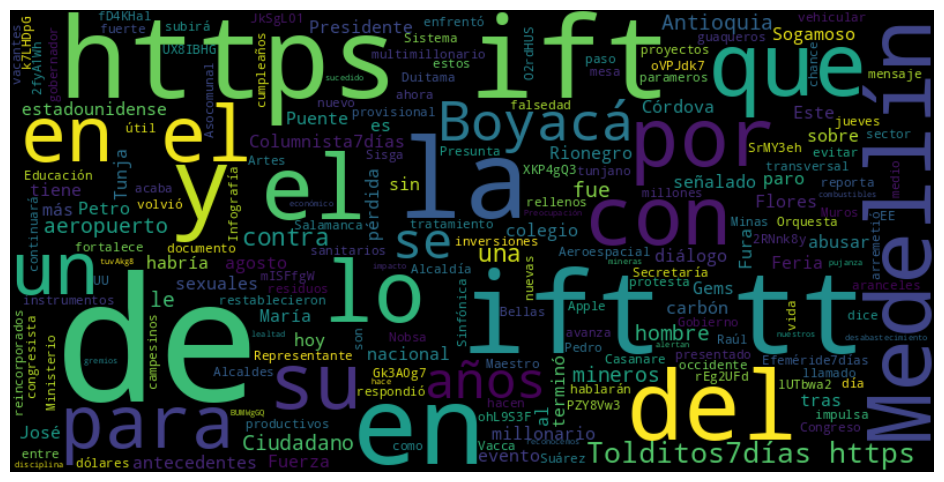

In [39]:

all_text = " ".join(df["text"])
wc = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
